In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
%matplotlib inline

In [3]:
df = pd.read_csv('Bank.csv')

In [4]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.drop('ID',axis=1,inplace=True)

In [6]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


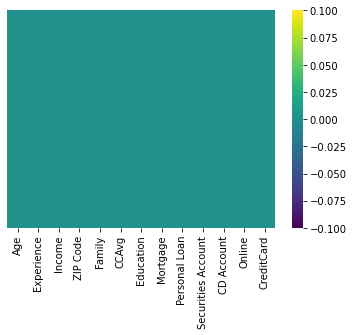

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [9]:
df.Experience.unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [10]:
df.loc[(df.Experience < 0),'Experience']= np.nan

In [11]:
df.isnull().any()

Age                   False
Experience             True
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [12]:
df.shape

(5000, 13)

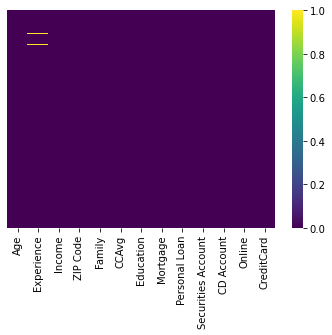

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

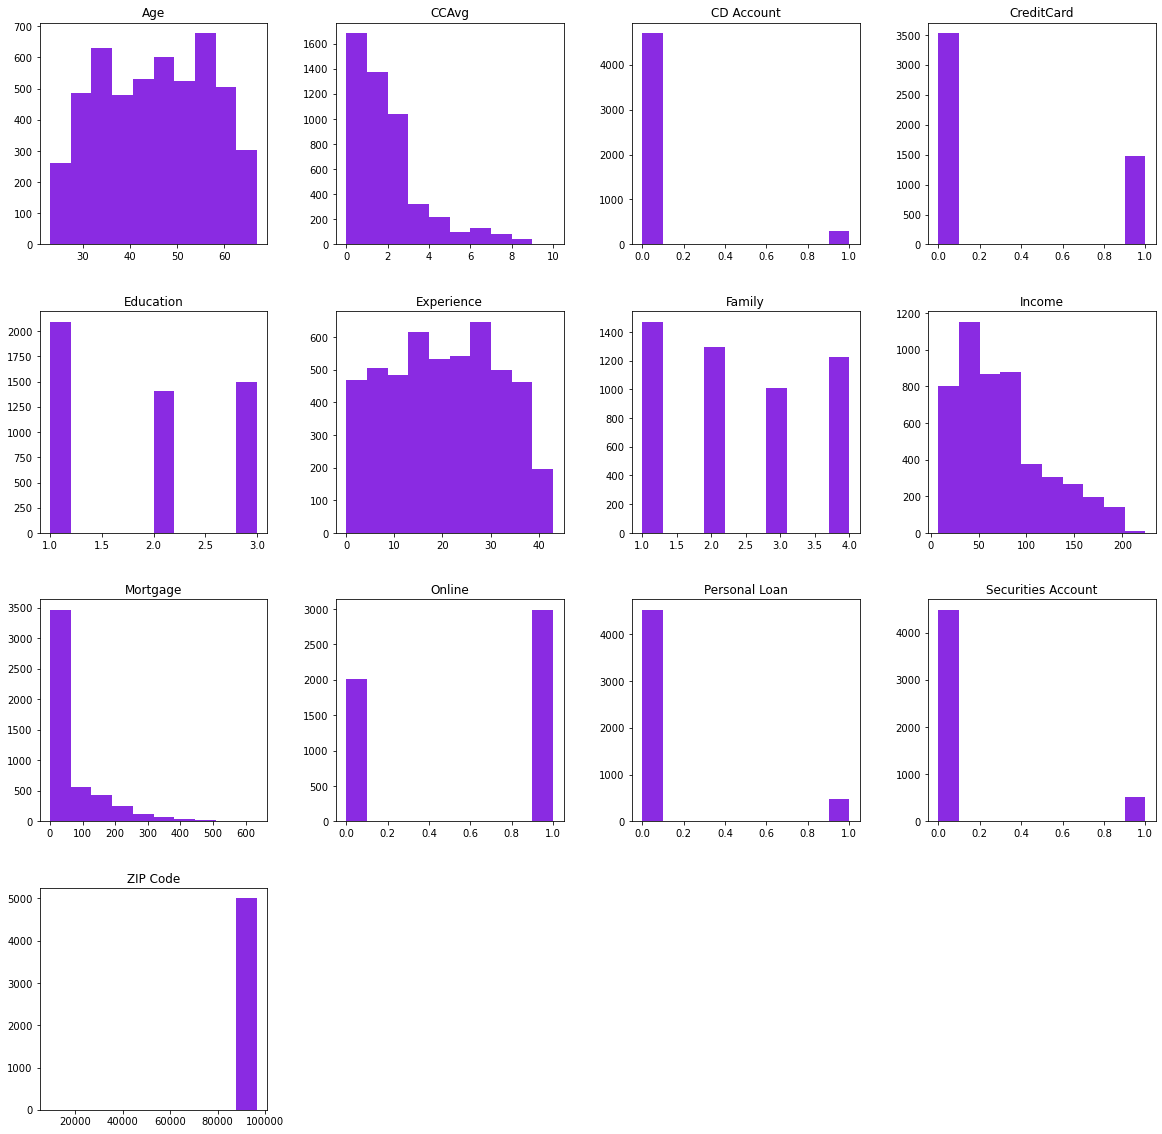

In [14]:
df.hist(figsize=(20,20),color="blueviolet",grid=False)
plt.show()

In [15]:
df[df['Personal Loan'] == 0]['CCAvg'].mean()*1000

1729.0088495575294

In [16]:
df[df['Personal Loan'] == 1]['CCAvg'].mean()*1000

3905.354166666666

In [17]:
df[df['Personal Loan'] == 0]['Online'].mean()*1000

595.7964601769912

In [18]:
df[df['Personal Loan'] == 1]['Online'].mean()*1000

606.25

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.0,67.0
Experience,4948.0,20.331043,11.311973,0.0,10.75,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.0,1.0


In [20]:
df['Experience'].fillna(df['Experience'].median(), inplace=True)

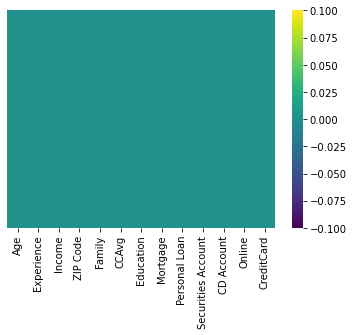

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

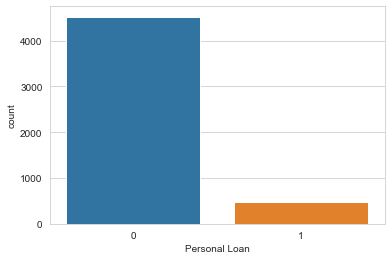

In [22]:
sns.set_style("whitegrid")
sns.countplot(x="Personal Loan",data=df)

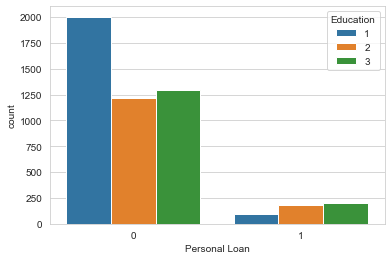

In [23]:
sns.set_style("whitegrid")
sns.countplot(x="Personal Loan",hue="Education",data=df)

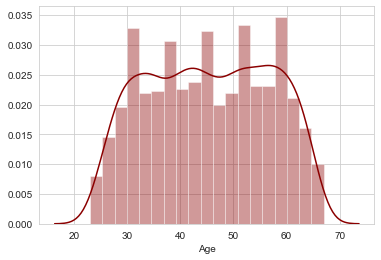

In [24]:
sns.distplot(df['Age'],kde=True,color="darkred")

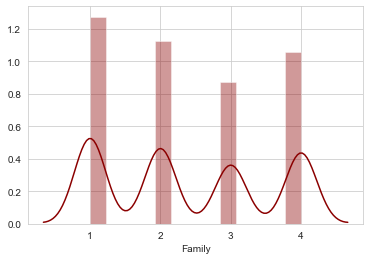

In [25]:
sns.distplot(df['Family'],kde=True,color="darkred")

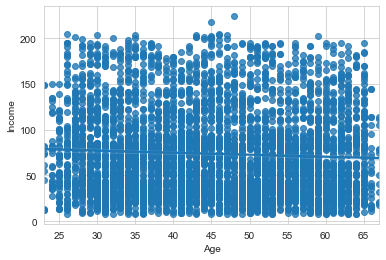

In [26]:
ax = sns.regplot(x="Age", y="Income", data=df)

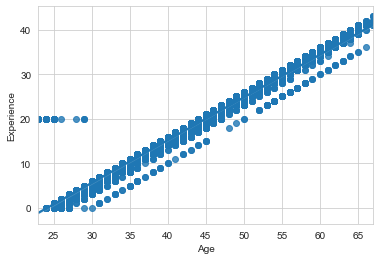

In [27]:
ax = sns.regplot(x="Age", y="Experience", data=df)

In [28]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [29]:
final_df = df[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard','Personal Loan']]
final_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1.0,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,19.0,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,1,0


In [30]:
final_df.drop('ZIP Code',axis=1,inplace=True)

C:\Users\shash\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


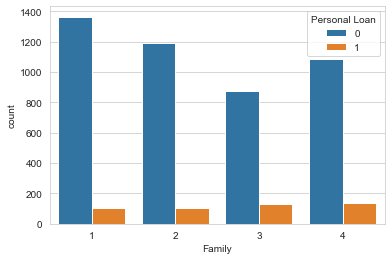

In [31]:
sns.countplot(x='Family',data=final_df,hue='Personal Loan')

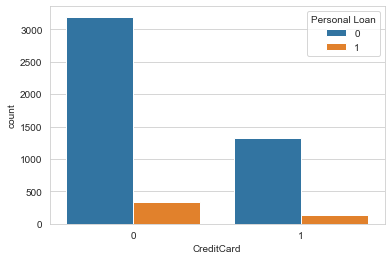

In [32]:
sns.countplot(x='CreditCard',data=final_df,hue='Personal Loan')

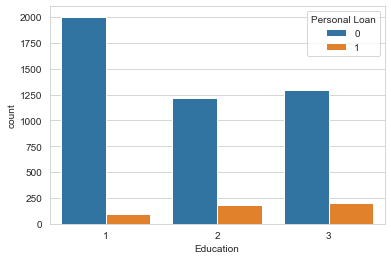

In [33]:
sns.countplot(x='Education',data=final_df,hue='Personal Loan')

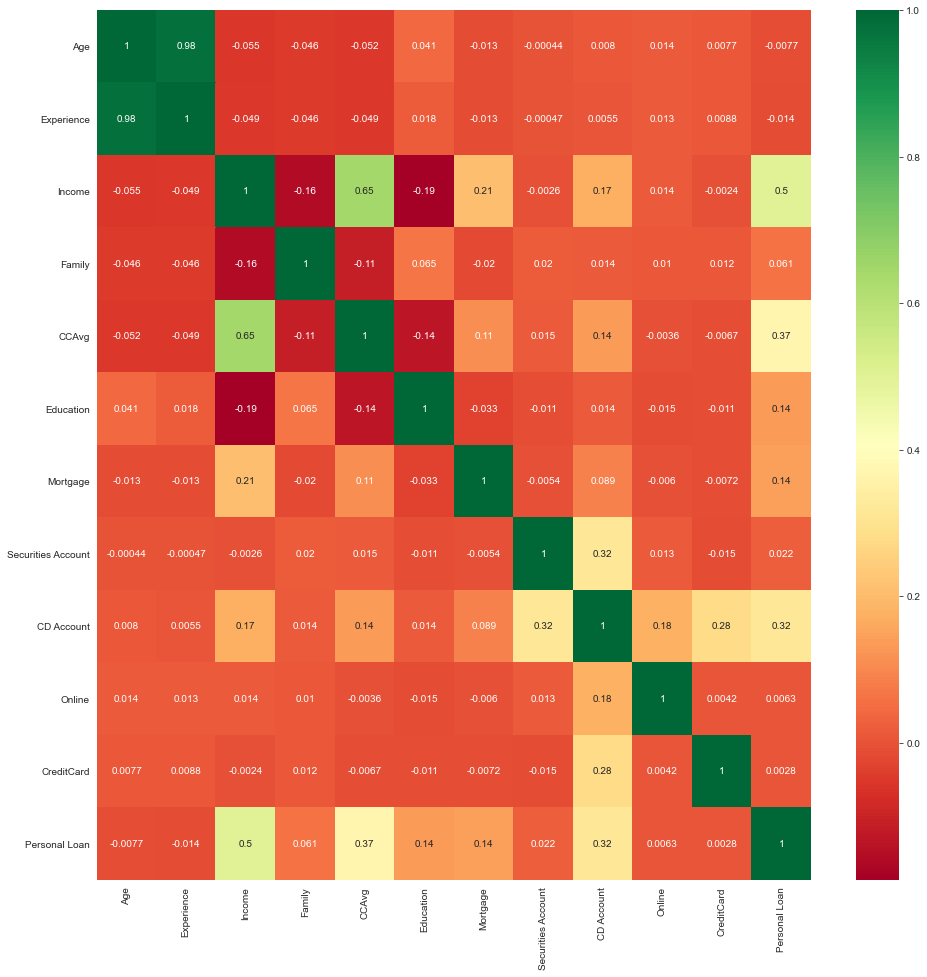

In [34]:
corrmat=final_df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(16,16))
g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [35]:
final_df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Personal Loan'],
      dtype='object')

In [36]:
X=final_df[['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard']]
y=final_df[['Personal Loan']]

In [37]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Parameters','Score']  #naming the dataframe columns
featureScores.Score= featureScores.Score/10000

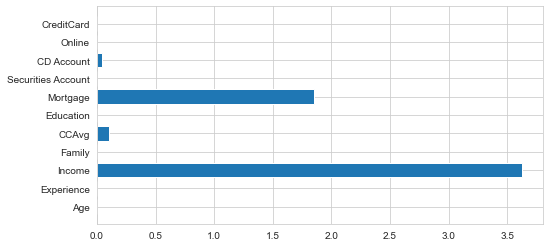

In [38]:
fig, ax = plt.subplots(figsize =(8,4))
Parameters = featureScores['Parameters']
Score = featureScores['Score']
ax.barh(Parameters,Score)
plt.show()

In [39]:
X_train,X_test,y_train,y_test=train_test_split(final_df.drop('Personal Loan',axis=1),final_df['Personal Loan'],test_size=0.20,random_state=1)

In [40]:
X_test.shape

(1000, 11)

In [41]:
logmodel=LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print(accuracy*100)
result = confusion_matrix(y_test,predictions)
print("Confusion Matrix:")
print(result)
print(classification_report(y_test,predictions))

94.69999999999999
Confusion Matrix:
[[888  12]
 [ 41  59]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       900
           1       0.83      0.59      0.69       100

    accuracy                           0.95      1000
   macro avg       0.89      0.79      0.83      1000
weighted avg       0.94      0.95      0.94      1000



[0.958, 0.958, 0.958, 0.955, 0.955, 0.951, 0.949, 0.949, 0.945, 0.943, 0.941, 0.943]
The optimal number of neighbors is 1


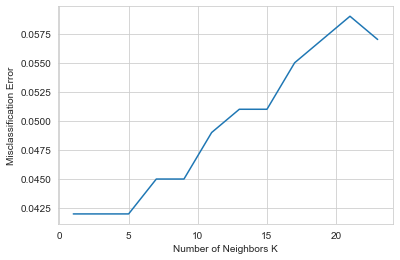

In [42]:
ac_score=[]
myList = list(range(1,25))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors =k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    result2 = accuracy_score(y_test,y_pred)
    ac_score.append(result2)
print(ac_score)
MSE = [1 - x for x in ac_score]
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [43]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
result2 = accuracy_score(y_test,y_pred)
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2*100)

Confusion Matrix:
[[893   7]
 [ 35  65]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       900
           1       0.90      0.65      0.76       100

    accuracy                           0.96      1000
   macro avg       0.93      0.82      0.87      1000
weighted avg       0.96      0.96      0.95      1000

Accuracy: 95.8


In [45]:
import pickle
file=open('knn.pkl','wb')
pickle.dump(classifier,file)